# ***HORSE RACING CLASSIFICATION PROJECT***

## Import all the crucial libraries

In [ ]:
pip install catboost

     |████████████████████████████████| 66.1MB 61kB/s 


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.multiclass import OneVsRestClassifier
from warnings import filterwarnings
filterwarnings('ignore')

## Import the dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Horse_Racing_Project_son1.csv to Horse_Racing_Project_son1.csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['Horse_Racing_Project_son1.csv']))
data.index = data.ID
df = data.drop(["ID"],axis=1)
df.head()

,city,LAST_RACER_SAME_AS_CURRENT_RACER_BINARY,Speed_in_Secs,GANYAN_TRANS,RANK,AG_Percentage,AG_RANK_AMONG_GROUP,AG_RANKING_Score_Normalized,First_Position_Percentage,Second_Position_Percentage,Third_Position_Percentage,Fourth_Position_Percentage,TOP_THREE_RACER_PERCENTAGE,RANK_LATEST_2ND,RANK_LATEST_3RD,RANK_LATEST_4TH,RANK_LATEST_5TH,TOPLAM_RACES,TOPLAM_1ST,TOPLAM_2ND,TOPLAM_3RD,TOPLAM_4TH,BIRINCILIK_PERCENTAGE,IKINCILIK_PERCENTAGE,UCUNCULUK_PERCENTAGE,DORDUNCULUK_PERCENTAGE,SPEED_LATEST_1ST,SPEED_LATEST_2nd,SPEED_LATEST_3rd,SPEED_LATEST_4th,SPEED_LATEST_5th,kosu,kosu_zamanı,at_yası,at_ana,at_baba,Mevsim,KG,K,DB,SK,SKG,GKR,YP,TGK,ÖG,SGKR,Winner,ılk_3,ılk_5,Year,Month,Day,day_of_week,at_soyu
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ENGİNYAR(12) KG SK,Elazığ,1,157.51,12.65,8,2.0,11,21,8,8,7,9,23,10.0,5.0,11.0,10.0,35,1,3,0,6,2,8,0,17,11.427846,10.886131,11.464023,10.979962,9.382513,8,akşam,4,a,a,yaz,1,0,0,1,0,0,0,0,0,0,out_1,out_3,out_5,2015,8,7,4,aa
TÜRK LOKUMU(8) KG,Elazığ,1,167.86,15.85,13,1.0,12,0,4,6,6,7,16,6.0,6.0,9.0,7.0,22,1,1,2,4,4,4,9,18,10.127487,13.877645,13.452484,13.588275,13.971359,8,akşam,4,a,k,yaz,1,0,0,0,0,0,0,0,0,0,out_1,out_3,out_5,2015,7,29,2,ak
KINGDOM(6) KG K,Elazığ,1,147.87,10.10,7,3.0,11,8,8,8,7,8,23,14.0,8.0,7.0,9.0,56,6,6,9,5,10,10,16,8,13.525394,14.896787,13.979171,14.004570,13.728720,6,öğle,7,d,a,yaz,1,1,0,0,0,0,0,0,0,0,out_1,out_3,out_5,2015,7,29,2,da
ŞAHDİLDAR(10) KG K,Ankara,1,74.67,3.55,7,16.0,2,90,14,13,13,12,40,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,16.070711,0.000000,0.000000,0.000000,0.000000,8,öğle,2,d,d,yaz,1,1,0,0,0,0,0,0,0,0,out_1,out_3,out_5,2015,7,21,1,dd
DEHERE VERE(8) SKG SK,Ankara,1,73.96,8.80,3,5.0,8,29,8,9,10,10,27,0.0,0.0,0.0,0.0,1,0,0,1,0,0,0,100,0,16.224986,0.000000,0.000000,0.000000,0.000000,8,öğle,2,a,d,yaz,0,0,0,1,1,0,0,0,0,0,out_1,in_3,in_5,2015,7,21,1,ad


## Exploration of Variables

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LAST_RACER_SAME_AS_CURRENT_RACER_BINARY,12359.0,0.906060,0.291757,0.00,1.000000,1.000000,1.000000,1.000000
Speed_in_Secs,12359.0,109.732902,24.832572,0.00,89.470000,104.210000,129.210000,239.240000
GANYAN_TRANS,12359.0,21.670049,22.336356,1.05,7.125000,14.600000,28.550000,351.200000
AG_Percentage,12359.0,4.511449,7.551561,0.00,1.000000,2.000000,5.000000,78.000000
AG_RANK_AMONG_GROUP,12359.0,7.608221,4.415019,0.00,4.000000,8.000000,11.000000,22.000000
AG_RANKING_Score_Normalized,12359.0,47.974998,30.163330,0.00,25.000000,45.000000,71.000000,100.000000
First_Position_Percentage,12359.0,7.882110,4.130471,0.00,6.000000,8.000000,9.000000,100.000000
Second_Position_Percentage,12359.0,8.256089,3.436268,0.00,7.000000,8.000000,10.000000,100.000000
Third_Position_Percentage,12359.0,8.537989,3.114032,0.00,7.000000,9.000000,10.000000,100.000000
Fourth_Position_Percentage,12359.0,8.888826,2.419463,0.00,8.000000,9.000000,10.000000,100.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12359 entries, ENGİNYAR(12) KG  SK   to ZAMANIN HARİKASI(9) KG  DB  SK  
Data columns (total 55 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   city                                     12359 non-null  object 
 1   LAST_RACER_SAME_AS_CURRENT_RACER_BINARY  12359 non-null  int64  
 2   Speed_in_Secs                            12359 non-null  float64
 3   GANYAN_TRANS                             12359 non-null  float64
 4   RANK                                     12359 non-null  int64  
 5   AG_Percentage                            12359 non-null  float64
 6   AG_RANK_AMONG_GROUP                      12359 non-null  int64  
 7   AG_RANKING_Score_Normalized              12359 non-null  int64  
 8   First_Position_Percentage                12359 non-null  int64  
 9   Second_Position_Percentage               12359 non-null  int64  
 10  Thir

In [ ]:
df.isnull().sum()

city                                       0
LAST_RACER_SAME_AS_CURRENT_RACER_BINARY    0
Hafta_Gunu                                 0
Speed_in_Secs                              0
GANYAN_TRANS                               0
RANK                                       0
AG_Percentage                              0
AG_RANK_AMONG_GROUP                        0
AG_RANKING_Score_Normalized                0
First_Position_Percentage                  0
Second_Position_Percentage                 0
Third_Position_Percentage                  0
Fourth_Position_Percentage                 0
TOP_THREE_RACER_PERCENTAGE                 0
RANK_LATEST_2ND                            0
RANK_LATEST_3RD                            0
RANK_LATEST_4TH                            0
RANK_LATEST_5TH                            0
TOPLAM_RACES                               0
TOPLAM_1ST                                 0
TOPLAM_2ND                                 0
TOPLAM_3RD                                 0
TOPLAM_4TH

## Feature Engineering

In [ ]:
df['ılk_3'] = df['ılk_3'].astype(str)
df['ılk_5'] = df['ılk_5'].astype(str)
df['Winner'] = df['Winner'].astype(str)
df['RANK'] = df['RANK'].astype(str)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12359 entries, ENGİNYAR(12) KG  SK   to ZAMANIN HARİKASI(9) KG  DB  SK  
Data columns (total 55 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   city                                     12359 non-null  object 
 1   LAST_RACER_SAME_AS_CURRENT_RACER_BINARY  12359 non-null  int64  
 2   Speed_in_Secs                            12359 non-null  float64
 3   GANYAN_TRANS                             12359 non-null  float64
 4   RANK                                     12359 non-null  object 
 5   AG_Percentage                            12359 non-null  float64
 6   AG_RANK_AMONG_GROUP                      12359 non-null  int64  
 7   AG_RANKING_Score_Normalized              12359 non-null  int64  
 8   First_Position_Percentage                12359 non-null  int64  
 9   Second_Position_Percentage               12359 non-null  int64  
 10  Thir

In [ ]:
Hafta_Gunu = []

for i in df["day_of_week"]:
    
    # m= i.weekday()
    
    if i>=0 and i<5:
        Hafta_Gunu.append("Hafta İçi")
    else:
        Hafta_Gunu.append("Hafta Sonu") 

Hafta_Gunu[0:5]  


['Hafta İçi', 'Hafta İçi', 'Hafta İçi', 'Hafta İçi', 'Hafta İçi']

In [ ]:
df.insert(2, "Hafta_Gunu",Hafta_Gunu, True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12359 entries, ENGİNYAR(12) KG  SK   to ZAMANIN HARİKASI(9) KG  DB  SK  
Data columns (total 56 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   city                                     12359 non-null  object 
 1   LAST_RACER_SAME_AS_CURRENT_RACER_BINARY  12359 non-null  int64  
 2   Hafta_Gunu                               12359 non-null  object 
 3   Speed_in_Secs                            12359 non-null  float64
 4   GANYAN_TRANS                             12359 non-null  float64
 5   RANK                                     12359 non-null  object 
 6   AG_Percentage                            12359 non-null  float64
 7   AG_RANK_AMONG_GROUP                      12359 non-null  int64  
 8   AG_RANKING_Score_Normalized              12359 non-null  int64  
 9   First_Position_Percentage                12359 non-null  int64  
 10  Seco

In [ ]:
# kategorik değişkenler
df_categorical = df.select_dtypes(include=['object'])
df_categorical.head()

,city,Hafta_Gunu,RANK,kosu_zamanı,at_ana,at_baba,Mevsim,Winner,ılk_3,ılk_5,at_soyu
ID,,,,,,,,,,,
ENGİNYAR(12) KG SK,Elazığ,Hafta İçi,8,akşam,a,a,yaz,out_1,out_3,out_5,aa
TÜRK LOKUMU(8) KG,Elazığ,Hafta İçi,13,akşam,a,k,yaz,out_1,out_3,out_5,ak
KINGDOM(6) KG K,Elazığ,Hafta İçi,7,öğle,d,a,yaz,out_1,out_3,out_5,da
ŞAHDİLDAR(10) KG K,Ankara,Hafta İçi,7,öğle,d,d,yaz,out_1,out_3,out_5,dd
DEHERE VERE(8) SKG SK,Ankara,Hafta İçi,3,öğle,a,d,yaz,out_1,in_3,in_5,ad


## Encoding the categorical data

In [ ]:
dummy_variable=pd.get_dummies(df[['city','Hafta_Gunu', 'kosu_zamanı', "at_ana", "at_baba", "Mevsim", "at_soyu"]])

In [ ]:
y = df["ılk_3"]
X_ = df.drop(["RANK",'city','Hafta_Gunu', 'kosu_zamanı', "at_ana", "at_baba", "Mevsim", "Winner", "ılk_3", "ılk_5", "at_soyu"],axis=1).astype('float64')
X = pd.concat((X_,dummy_variable),axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.20,
                                                    random_state=42)
print("X_train shape",X_train.shape)
print("X_test shape",X_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

X_train shape (9887, 90)
X_test shape (2472, 90)
y_train shape (9887,)
y_test shape (2472,)


In [ ]:
X_train.head(5)

,LAST_RACER_SAME_AS_CURRENT_RACER_BINARY,Speed_in_Secs,GANYAN_TRANS,AG_Percentage,AG_RANK_AMONG_GROUP,AG_RANKING_Score_Normalized,First_Position_Percentage,Second_Position_Percentage,Third_Position_Percentage,Fourth_Position_Percentage,TOP_THREE_RACER_PERCENTAGE,RANK_LATEST_2ND,RANK_LATEST_3RD,RANK_LATEST_4TH,RANK_LATEST_5TH,TOPLAM_RACES,TOPLAM_1ST,TOPLAM_2ND,TOPLAM_3RD,TOPLAM_4TH,BIRINCILIK_PERCENTAGE,IKINCILIK_PERCENTAGE,UCUNCULUK_PERCENTAGE,DORDUNCULUK_PERCENTAGE,SPEED_LATEST_1ST,SPEED_LATEST_2nd,SPEED_LATEST_3rd,SPEED_LATEST_4th,SPEED_LATEST_5th,kosu,at_yası,KG,K,DB,SK,SKG,GKR,YP,TGK,ÖG,...,city_Karma Adana,city_Karma Kocaeli,city_Karma İstanbul,city_Karma İzmir,city_Karma Şanlıurfa,city_Kocaeli,city_İstanbul,city_İzmir,city_Şanlıurfa,Hafta_Gunu_Hafta Sonu,Hafta_Gunu_Hafta İçi,kosu_zamanı_akşam,kosu_zamanı_öğle,at_ana_a,at_ana_d,at_ana_k,at_baba_a,at_baba_d,at_baba_e,at_baba_g,at_baba_k,Mevsim_ilkbahar,Mevsim_kis,Mevsim_sonbahar,Mevsim_yaz,at_soyu_aa,at_soyu_ad,at_soyu_ae,at_soyu_ag,at_soyu_ak,at_soyu_da,at_soyu_dd,at_soyu_de,at_soyu_dg,at_soyu_dk,at_soyu_ka,at_soyu_kd,at_soyu_ke,at_soyu_kg,at_soyu_kk
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
YOU HAVE TO WIN(10) K,1.0,163.26,14.60,1.0,8.0,33.0,4.0,6.0,6.0,7.0,16.0,8.0,8.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.412838,14.082174,15.153428,0.000000,0.000000,8.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
REFFERANCE(6) DB SK,1.0,125.65,3.80,15.0,2.0,80.0,12.0,11.0,12.0,12.0,35.0,4.0,9.0,6.0,2.0,26.0,1.0,3.0,3.0,7.0,3.0,11.0,11.0,26.0,15.917230,16.317650,16.660716,15.923567,15.169275,2.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
TOMURCUK ÇİÇEK(10) KG DB,1.0,100.15,23.10,3.0,8.0,50.0,8.0,11.0,9.0,10.0,28.0,4.0,3.0,7.0,2.0,35.0,2.0,3.0,3.0,7.0,5.0,8.0,8.0,20.0,13.979031,13.952561,13.736264,14.091595,13.789099,6.0,6.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
MÜRVETİM(10) KG DB SK,1.0,86.69,24.30,1.0,9.0,9.0,2.0,2.0,3.0,4.0,7.0,9.0,11.0,10.0,18.0,29.0,1.0,1.0,1.0,5.0,3.0,3.0,3.0,17.0,0.000000,13.842427,13.282732,13.481934,0.000000,3.0,7.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
LADY SNOW(2) DB SKG SK,0.0,82.76,20.85,2.0,9.0,35.0,9.0,10.0,11.0,10.0,30.0,8.0,8.0,3.0,9.0,26.0,1.0,2.0,3.0,1.0,3.0,7.0,11.0,3.0,13.766881,15.708072,14.965579,15.880218,13.575307,2.0,3.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


# ***TOP 3 HORSE CLASSIFICATION***

## CART MODEL

In [ ]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, y_train)

In [ ]:
cart_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
!pip install SKompiler[full]

     |████████████████████████████████| 51kB 1.6MB/s 
  Created wheel for SKompiler: filename=SKompiler-0.5.5-cp36-none-any.whl size=57148 sha256=930cac4446b8b299abe02465e774e3fe4b9ccebbc7edf112f52cdaca320be219
  Stored in directory: /root/.cache/pip/wheels/21/eb/99/6e32f89da503a823f6bc1a985abfdaeaa01b3a6b5ac5776d15
Successfully built SKompiler


In [ ]:
from skompiler import skompile
print(skompile(cart_model.predict).to("python/code"))

In [ ]:
y_pred = cart_model.predict(X_test)
accurarcy_score_before = accuracy_score(y_test, y_pred)
accurarcy_score_before

0.9114077669902912

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        in_3       0.43      0.44      0.43       190
       out_3       0.95      0.95      0.95      2282

    accuracy                           0.91      2472
   macro avg       0.69      0.69      0.69      2472
weighted avg       0.91      0.91      0.91      2472



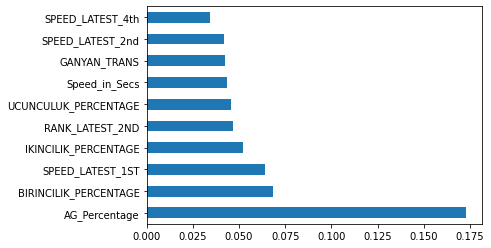

In [ ]:
feature_importance = pd.Series(cart.feature_importances_,
                          index=X_test.columns)
feature_importance.nlargest(10).plot(kind= "barh");

### CART - Model Tuning

In [ ]:
cart_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
?cart_model

In [ ]:
cart_grid = {"max_depth": range(3,8),
            "min_samples_split" :list(range(40,80)),
            'criterion' : ("gini", "entropy") }

In [ ]:
cart = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart,
                       cart_grid, 
                       cv = 10, 
                       n_jobs = -1, 
                       verbose = 2)
cart_cv_model = cart_cv.fit(X_train, y_train)

Fitting 10 folds for each of 400 candidates, totalling 4000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:   28.5s
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:   52.7s
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 2588 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 3277 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 4000 out of 4000 | elapsed:  7.3min finished


In [ ]:
print("En iyi parametreler: " + str(cart_cv_model.best_params_))


En iyi parametreler: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 59}


In [ ]:
cart = tree.DecisionTreeClassifier(criterion= "entropy", 
                                   max_depth = 7, 
                                   min_samples_split = 59)
cart_tuned = cart.fit(X_train, y_train)

In [ ]:
y_pred = cart_tuned.predict(X_test)
accurarcy_score_after = accuracy_score(y_test, y_pred)
accurarcy_score_after

0.9381067961165048

In [ ]:
accurarcy_score_check(accurarcy_score_before, accurarcy_score_after)

Before Tuning score :  0.9114077669902912
After Tuning score : 0.9381067961165048
İyileşme oldu :  0.02669902912621358


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        in_3       0.75      0.29      0.42       190
       out_3       0.94      0.99      0.97      2282

    accuracy                           0.94      2472
   macro avg       0.85      0.64      0.69      2472
weighted avg       0.93      0.94      0.93      2472



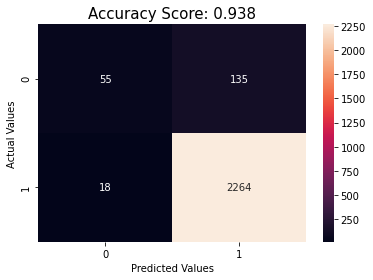

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix as cm
predictions = cart_tuned.predict(X_test)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(y_test, predictions)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(cart_tuned, 
                out_file="tree.png", 
                impurity=False, 
                filled=True)

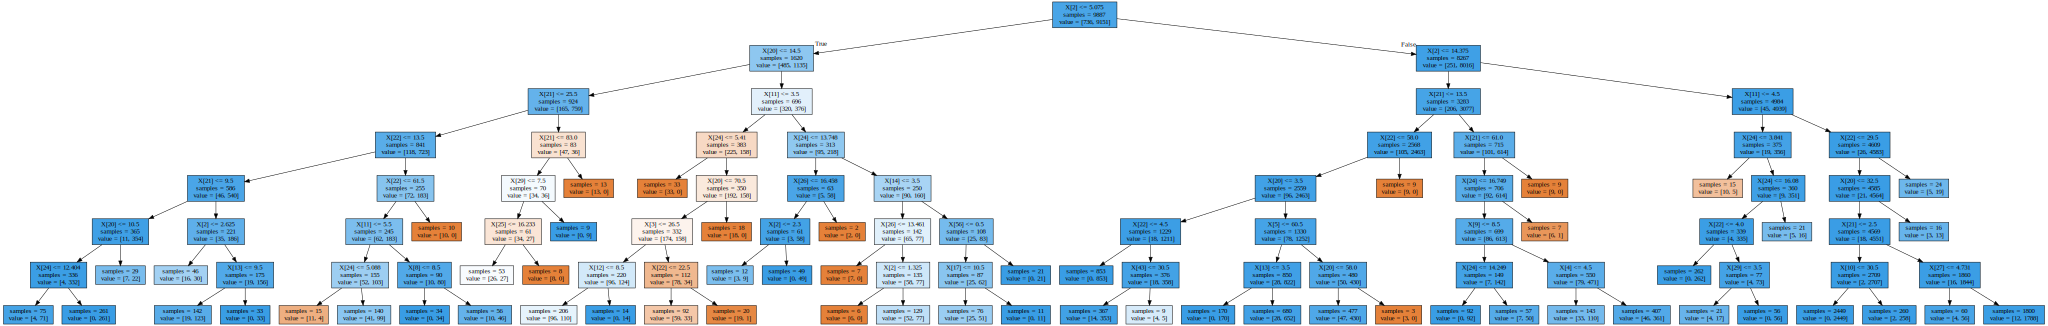

In [ ]:
import graphviz

with open("tree.png") as f: 
    dot_graph = f.read()
graphviz.Source(dot_graph)

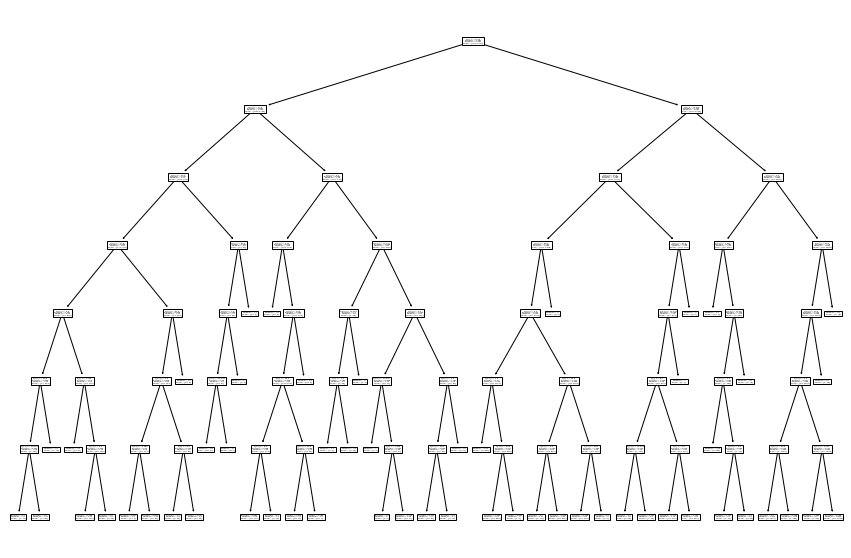

In [ ]:
plt.figure(figsize=(15,10))
tree.plot_tree(cart_tuned);

### Feature Importance 

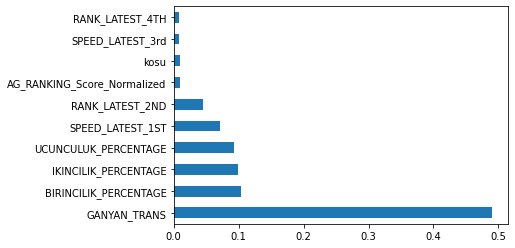

In [ ]:
feature_importance = pd.Series(cart_tuned.feature_importances_,
                          index=X_test.columns)
feature_importance.nlargest(10).plot(kind= "barh");

In [ ]:
a= pd.DataFrame(data= feature_importance.nlargest(10), columns= ["Importance"])
for feature_name in a.index[:10]:
    print("-"*28)
    print(feature_name + ":" )
    print("Feature Importance: {:.2%}".format(a.Importance[feature_name]))

----------------------------
GANYAN_TRANS:
Feature Importance: 49.07%
----------------------------
BIRINCILIK_PERCENTAGE:
Feature Importance: 10.41%
----------------------------
IKINCILIK_PERCENTAGE:
Feature Importance: 9.98%
----------------------------
UCUNCULUK_PERCENTAGE:
Feature Importance: 9.23%
----------------------------
SPEED_LATEST_1ST:
Feature Importance: 7.15%
----------------------------
RANK_LATEST_2ND:
Feature Importance: 4.55%
----------------------------
AG_RANKING_Score_Normalized:
Feature Importance: 1.06%
----------------------------
kosu:
Feature Importance: 0.96%
----------------------------
SPEED_LATEST_3rd:
Feature Importance: 0.88%
----------------------------
RANK_LATEST_4TH:
Feature Importance: 0.84%


## BOOSTING MODELS

### Gradient Boosting Model

In [ ]:
GradientBoostingClassifier()

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
gbm_model = OneVsRestClassifier(GradientBoostingClassifier()).fit(X_train, y_train)

In [ ]:
y_pred = gbm_model.predict(X_test)
accurarcy_score_before = accuracy_score(y_test, y_pred)
accurarcy_score_before

0.9466019417475728

### Gradient Boosting Model Tuning

In [ ]:
gbm_params = {"learning_rate": [0.3, 0.5, 0.8], 
              "n_estimators":[50,100,150],
              "max_depth": [3,5,8,10],
              "min_samples_split":[5,10,20,50],
              "max_features" :["auto", "sqrt", "log2"]
             }


gbm = GradientBoostingClassifier()
gbm_cv = GridSearchCV(gbm,gbm_params,
                          cv=10,
                          n_jobs=-1,
                          verbose=2)

gbm_cv.fit(X_train, y_train)

In [ ]:
print("En iyi parametreler : " + str(gbm_cv.best_params_))

En iyi parametreler : {'learning_rate': 0.3, 'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 50}


In [ ]:
gbm = GradientBoostingClassifier(learning_rate=0.3,
                                n_estimators=150,
                                max_depth=10,
                                min_samples_split=10,
                                max_features="auto")

gbm_tuned = gbm.fit(X_train, y_train)

In [ ]:
y_pred = gbm_tuned.predict(X_test)
accurarcy_score_after = accuracy_score(y_test, y_pred)
accurarcy_score_after

0.9449838187702265

In [ ]:
def accurarcy_score_check(accscorebefore, accscoreafter):
    print("Before Tuning score : ", accscorebefore )
    print("After Tuning score :", accscoreafter)
    
    if(accscoreafter > accscorebefore):
        print("İyileşme oldu : ", accscoreafter-accscorebefore)

In [ ]:
accurarcy_score_check(accurarcy_score_before, accurarcy_score_after)

Before Tuning score :  0.9466019417475728
After Tuning score : 0.9449838187702265


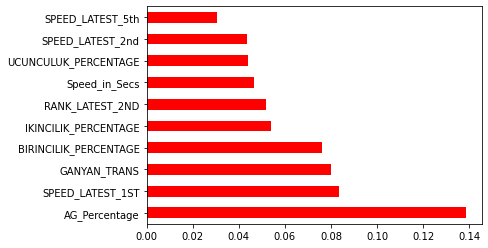

In [ ]:
feature_importance = pd.Series(gbm_tuned.feature_importances_,
                          index=X_test.columns)
feature_importance.nlargest(10).plot(kind= "barh", color = "red");

In [ ]:
a= pd.DataFrame(data= feature_importance.nlargest(10), columns= ["Importance"])
for feature_name in a.index[:10]:
    print("-"*28)
    print(feature_name + ":" )
    print("Feature Importance: {:.2%}".format(a.Importance[feature_name]))  

----------------------------
AG_Percentage:
Feature Importance: 13.85%
----------------------------
SPEED_LATEST_1ST:
Feature Importance: 8.36%
----------------------------
GANYAN_TRANS:
Feature Importance: 8.02%
----------------------------
BIRINCILIK_PERCENTAGE:
Feature Importance: 7.60%
----------------------------
IKINCILIK_PERCENTAGE:
Feature Importance: 5.40%
----------------------------
RANK_LATEST_2ND:
Feature Importance: 5.19%
----------------------------
Speed_in_Secs:
Feature Importance: 4.65%
----------------------------
UCUNCULUK_PERCENTAGE:
Feature Importance: 4.40%
----------------------------
SPEED_LATEST_2nd:
Feature Importance: 4.34%
----------------------------
SPEED_LATEST_5th:
Feature Importance: 3.04%


### Light GBM Model

In [ ]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

y_pred = lgbm_model.predict(X_test)

accurarcy_score_before = accuracy_score(y_test, y_pred)
accurarcy_score_before

0.9486245954692557

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        in_3       0.76      0.49      0.59       190
       out_3       0.96      0.99      0.97      2282

    accuracy                           0.95      2472
   macro avg       0.86      0.74      0.78      2472
weighted avg       0.94      0.95      0.94      2472



In [ ]:
lgbm_B = accurarcy_score_before
lgbm_model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

### Light GBM Model Tuning

In [ ]:
lgbm_params = {"learning_rate": [0.1, 0.3, 0.5], 
              "n_estimators":[50,100,200],
              "subsamples" : [0.6,0.8,1.0],
              "max_depth": [4,6,9,12],
               "max_features" :["auto", "sqrt", "log2"],
              "min_child_samples":[10,20,30]
            }

lgbm = LGBMClassifier()

In [ ]:
lgbm_cv = GridSearchCV(lgbm,lgbm_params,
                          cv=10,
                          n_jobs=-1,
                          verbose=2)

lgbm_cv.fit(X_train, y_train)

In [ ]:
print("En iyi parametreler : " + str(lgbm_cv.best_params_))

En iyi parametreler : {'learning_rate': 0.3, 'max_depth': 6, 'min_child_samples': 10, 'n_estimators': 200, 'subsamples': 0.6}


In [ ]:
lgbm = LGBMClassifier(learning_rate=0.5,
                    subsamples = 0.6,
                    n_estimators=200,
                    max_depth=6,
                    min_child_samples=30,
                    max_features = 'auto')

In [ ]:
lgbm_tuned = lgbm.fit(X_train, y_train)

In [ ]:
y_pred = lgbm_tuned.predict(X_test)
accurarcy_score_after = accuracy_score(y_test, y_pred)
accurarcy_score_after

0.9514563106796117

In [ ]:
accurarcy_score_check(accurarcy_score_before, accurarcy_score_after)

Before Tuning score :  0.9486245954692557
After Tuning score : 0.9453883495145631


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        in_3       0.76      0.49      0.60       190
       out_3       0.96      0.99      0.97      2282

    accuracy                           0.95      2472
   macro avg       0.86      0.74      0.79      2472
weighted avg       0.94      0.95      0.94      2472



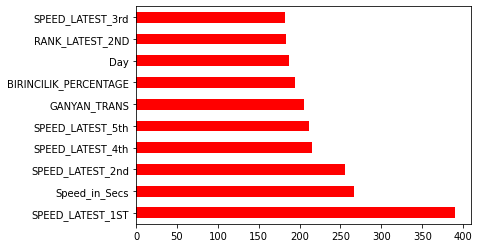

In [ ]:
feature_importance = pd.Series(lgbm_tuned.feature_importances_,
                          index=X_test.columns)
feature_importance.nlargest(10).plot(kind= "barh", color = "red");

In [ ]:
a= pd.DataFrame(data= feature_importance.nlargest(10), columns= ["Importance"])
for feature_name in a.index[:10]:
    print("-"*28)
    print(feature_name + ":" )
    print("Feature Importance: {:.1%}".format(a.Importance[feature_name]/1000)) 

----------------------------
SPEED_LATEST_1ST:
Feature Importance: 39.0%
----------------------------
Speed_in_Secs:
Feature Importance: 26.7%
----------------------------
SPEED_LATEST_2nd:
Feature Importance: 25.5%
----------------------------
SPEED_LATEST_4th:
Feature Importance: 21.5%
----------------------------
SPEED_LATEST_5th:
Feature Importance: 21.1%
----------------------------
GANYAN_TRANS:
Feature Importance: 20.5%
----------------------------
BIRINCILIK_PERCENTAGE:
Feature Importance: 19.4%
----------------------------
Day:
Feature Importance: 18.7%
----------------------------
RANK_LATEST_2ND:
Feature Importance: 18.3%
----------------------------
SPEED_LATEST_3rd:
Feature Importance: 18.2%


### Cat Boosting Model

In [ ]:
cat_model = OneVsRestClassifier(CatBoostClassifier()).fit(X_train, y_train)

Learning rate set to 0.027405
0:	learn: 0.6549452	total: 58.6ms	remaining: 58.5s
1:	learn: 0.6183692	total: 64.5ms	remaining: 32.2s
2:	learn: 0.5876945	total: 73.4ms	remaining: 24.4s
3:	learn: 0.5569333	total: 82.4ms	remaining: 20.5s
4:	learn: 0.5318217	total: 91.5ms	remaining: 18.2s
5:	learn: 0.5039793	total: 101ms	remaining: 16.7s
6:	learn: 0.4833751	total: 110ms	remaining: 15.6s
7:	learn: 0.4617691	total: 118ms	remaining: 14.7s
8:	learn: 0.4411228	total: 127ms	remaining: 14s
9:	learn: 0.4235856	total: 136ms	remaining: 13.5s
10:	learn: 0.4054726	total: 146ms	remaining: 13.1s
11:	learn: 0.3913538	total: 155ms	remaining: 12.8s
12:	learn: 0.3740342	total: 164ms	remaining: 12.5s
13:	learn: 0.3578558	total: 174ms	remaining: 12.2s
14:	learn: 0.3468587	total: 183ms	remaining: 12s
15:	learn: 0.3333075	total: 192ms	remaining: 11.8s
16:	learn: 0.3209811	total: 204ms	remaining: 11.8s
17:	learn: 0.3111594	total: 213ms	remaining: 11.6s
18:	learn: 0.3004155	total: 222ms	remaining: 11.5s
19:	learn:

In [ ]:
y_pred = cat_model.predict(X_test)
accurarcy_score_before = accuracy_score(y_test, y_pred)
accurarcy_score_before

0.9542880258899676

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        in_3       0.82      0.52      0.63       190
       out_3       0.96      0.99      0.98      2282

    accuracy                           0.95      2472
   macro avg       0.89      0.75      0.80      2472
weighted avg       0.95      0.95      0.95      2472



### Cat Boosting Model Tuning

In [ ]:
catb_params = {"iterations": [200,500,750], 
               "learning_rate":[0.01, 0.1, 0.5],
               "depth" : [3,20,57],
               "min_child_samples" : [3,6,9,12]
}

catb = CatBoostClassifier()
catb_cv_model = GridSearchCV(catb,catb_params,
                          cv=5,
                          n_jobs=-1,
                          verbose=2)

catb_cv_model.fit(X_train, y_train)

In [ ]:
print("En iyi parametreler : " + str(catb_cv_model.best_params_))

En iyi parametreler : {'depth': 3, 'iterations': 750, 'learning_rate': 0.1, 'min_child_samples': 3}


In [ ]:
catb = CatBoostClassifier(learning_rate=0.1,
                    iterations=750,
                    depth=3,
                    min_child_samples = 3)

In [ ]:
catb_tuned = catb.fit(X_train, y_train)

0:	learn: 0.5856450	total: 5.53ms	remaining: 4.14s
1:	learn: 0.4821999	total: 11ms	remaining: 4.13s
2:	learn: 0.4115204	total: 16ms	remaining: 3.98s
3:	learn: 0.3573372	total: 21.1ms	remaining: 3.94s
4:	learn: 0.3162955	total: 26.1ms	remaining: 3.88s
5:	learn: 0.2876051	total: 31.1ms	remaining: 3.85s
6:	learn: 0.2662044	total: 36.2ms	remaining: 3.84s
7:	learn: 0.2527775	total: 41.1ms	remaining: 3.81s
8:	learn: 0.2399673	total: 46.2ms	remaining: 3.81s
9:	learn: 0.2290213	total: 51.2ms	remaining: 3.79s
10:	learn: 0.2173624	total: 56.1ms	remaining: 3.77s
11:	learn: 0.2069227	total: 61.3ms	remaining: 3.77s
12:	learn: 0.2009700	total: 66.1ms	remaining: 3.75s
13:	learn: 0.1951635	total: 71.7ms	remaining: 3.77s
14:	learn: 0.1918008	total: 76.9ms	remaining: 3.77s
15:	learn: 0.1885656	total: 81.9ms	remaining: 3.76s
16:	learn: 0.1863201	total: 87ms	remaining: 3.75s
17:	learn: 0.1830756	total: 92.3ms	remaining: 3.75s
18:	learn: 0.1794467	total: 97.5ms	remaining: 3.75s
19:	learn: 0.1770653	total: 

In [ ]:
y_pred = catb_tuned.predict(X_test)
accurarcy_score_after = accuracy_score(y_test, y_pred)
accurarcy_score_after

0.9502427184466019

In [ ]:
accurarcy_score_check(accurarcy_score_before, accurarcy_score_after)

Before Tuning score :  0.9542880258899676
After Tuning score : 0.9538834951456311


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        in_3       0.78      0.56      0.65       190
       out_3       0.96      0.99      0.98      2282

    accuracy                           0.95      2472
   macro avg       0.87      0.77      0.81      2472
weighted avg       0.95      0.95      0.95      2472



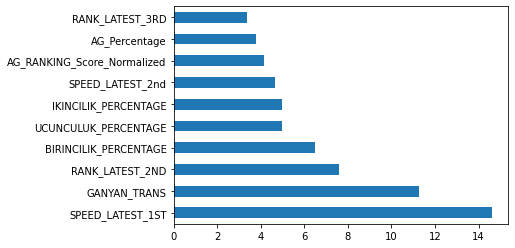

In [ ]:
feature_importance = pd.Series(catb_tuned.feature_importances_,
                          index=X_test.columns)
feature_importance.nlargest(10).plot(kind= "barh");

In [ ]:
a= pd.DataFrame(data= feature_importance.nlargest(10), columns= ["Importance"])
for feature_name in a.index[:10]:
    print("-"*28)
    print(feature_name + ":" )
    print("Feature Importance: {:.2%}".format(a.Importance[feature_name]/100))

----------------------------
SPEED_LATEST_1ST:
Feature Importance: 14.64%
----------------------------
GANYAN_TRANS:
Feature Importance: 11.24%
----------------------------
RANK_LATEST_2ND:
Feature Importance: 7.58%
----------------------------
BIRINCILIK_PERCENTAGE:
Feature Importance: 6.49%
----------------------------
UCUNCULUK_PERCENTAGE:
Feature Importance: 5.00%
----------------------------
IKINCILIK_PERCENTAGE:
Feature Importance: 4.97%
----------------------------
SPEED_LATEST_2nd:
Feature Importance: 4.65%
----------------------------
AG_RANKING_Score_Normalized:
Feature Importance: 4.14%
----------------------------
AG_Percentage:
Feature Importance: 3.78%
----------------------------
RANK_LATEST_3RD:
Feature Importance: 3.38%


## NEURAL NETWORK MODEL

In [ ]:
from sklearn.preprocessing import scale 
from sklearn.neural_network import MLPClassifier 

In [ ]:
X_train = scale(X_train) 
X_test = scale(X_test) 

In [ ]:
mlp_model = MLPClassifier().fit(X_train, y_train)

In [ ]:
y_pred = mlp_model.predict(X_test)
accurarcy_score_before = accuracy_score(y_test, y_pred)
accurarcy_score_before

0.9263754045307443

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        in_3       0.52      0.45      0.48       190
       out_3       0.95      0.97      0.96      2282

    accuracy                           0.93      2472
   macro avg       0.74      0.71      0.72      2472
weighted avg       0.92      0.93      0.92      2472



###  Neural Network- Model Tuning

In [ ]:
mlp_param = {"alpha": [0.1,0.01,0.02,0.3,0.4,0.5],
             "activation": ["relu","logistic"],
            "hidden_layer_sizes":[(5,5), (6,6), (7,7), (8,8)]}

In [ ]:
mlp_cv_model = GridSearchCV(mlp_model,
                            mlp_param, 
                            cv=10, n_jobs=-1, 
                            verbose=2)
mlp_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 27.5min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 33.5min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={

In [ ]:
print("En iyi parametreler : " + str(mlp_cv_model.best_params_))

En iyi parametreler : {'activation': 'logistic', 'alpha': 0.3, 'hidden_layer_sizes': (7, 7)}


In [ ]:
mlp_tuned = MLPClassifier(activation='logistic', alpha=0.3, hidden_layer_sizes=(7,7))

In [ ]:
mlp_tuned.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.3, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(7, 7), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
y_pred = mlp_tuned.predict(X_test)
accurarcy_score_after = accuracy_score(y_test, y_pred)
accurarcy_score_after

0.9413430420711975

In [ ]:
accurarcy_score_check(accurarcy_score_before, accurarcy_score_after)

Before Tuning score :  0.9263754045307443
After Tuning score : 0.9413430420711975
İyileşme oldu :  0.01496763754045316


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        in_3       0.73      0.37      0.49       190
       out_3       0.95      0.99      0.97      2282

    accuracy                           0.94      2472
   macro avg       0.84      0.68      0.73      2472
weighted avg       0.93      0.94      0.93      2472



## RANDOM FOREST MODEL

In [ ]:
rf3_model = RandomForestClassifier(random_state=42)
rf3_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
 y_pred = rf3_model.predict(X_test)

In [ ]:
accurarcy_score_before = accuracy_score(y_test, y_pred)
accurarcy_score_before

0.941747572815534

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        in_3       0.74      0.37      0.49       190
       out_3       0.95      0.99      0.97      2282

    accuracy                           0.94      2472
   macro avg       0.85      0.68      0.73      2472
weighted avg       0.93      0.94      0.93      2472



### Random Forest Model Tuning

In [ ]:
params = {      "max_depth" : [4,5,6,7],
                "max_features": [5,8,9,10],
                "min_samples_split" : [10,15,20,50],
                "n_estimators": [100,300,500],
                "class_weight": ['balanced', 'balanced_subsample']
         }

In [ ]:
rf_tuned = RandomForestClassifier(max_depth = 7,
                                  max_features =10,
                                  min_samples_split =10,
                                  n_estimators = 300,
                                  random_state=42, 
                                  class_weight ="balanced")

rf_tuned.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=7, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
accurarcy_score_after = accuracy_score(y_test, y_pred)
accurarcy_score_after

0.941747572815534

In [ ]:
accurarcy_score_check(accurarcy_score_before, accurarcy_score_after)

Before Tuning score :  0.941747572815534
After Tuning score : 0.941747572815534


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        in_3       0.74      0.37      0.49       190
       out_3       0.95      0.99      0.97      2282

    accuracy                           0.94      2472
   macro avg       0.85      0.68      0.73      2472
weighted avg       0.93      0.94      0.93      2472



# ***COMPARISON OF MODELS FOR TOP 3 HORSE***

In [ ]:
modeller = [
    mlp_tuned,
    cart_tuned,
    rf_tuned,
    gbm_tuned,
    catb_tuned,
    lgbm_tuned,]

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)     
    dogruluk = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(isimler + ":" )
    print("Accuracy: {:.4%}".format(dogruluk))

----------------------------
MLPClassifier:
Accuracy: 94.1343%
----------------------------
DecisionTreeClassifier:
Accuracy: 92.3139%
----------------------------
RandomForestClassifier:
Accuracy: 87.9854%
----------------------------
GradientBoostingClassifier:
Accuracy: 94.4984%
----------------------------
CatBoostClassifier:
Accuracy: 95.0243%
----------------------------
LGBMClassifier:
Accuracy: 81.3107%


#  ***TOP 5 HORSE CLASSIFICATION***

In [ ]:
data= pd.read_csv("Horse_Racing_Project_son1.csv",index_col="ID")
df = data.copy()
df.head()

df['ılk_3'] = df['ılk_3'].astype(str)
df['ılk_5'] = df['ılk_5'].astype(str)
df['Winner'] = df['Winner'].astype(str)
df['RANK'] = df['RANK'].astype(str)

Hafta_Gunu = []

for i in df["day_of_week"]:
    
    # m= i.weekday()
    
    if i>=0 and i<5:
        Hafta_Gunu.append("Hafta İçi")
    else:
        Hafta_Gunu.append("Hafta Sonu") 

Hafta_Gunu[0:5]  


df.insert(2, "Hafta_Gunu",Hafta_Gunu, True)

data = df.copy()

In [ ]:
dummy_variable =pd.get_dummies(df[['city','Hafta_Gunu', 'kosu_zamanı', "at_ana", "at_baba", "Mevsim", "at_soyu"]])

In [ ]:
y = data["ılk_5"]
X_ = data.drop(["RANK",'city','Hafta_Gunu', 'kosu_zamanı', "at_ana", "at_baba", "Mevsim", "Winner", "ılk_3", "ılk_5", "at_soyu"],axis=1).astype('float64')
X = pd.concat((X_,dummy_variable),axis=1)


X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.20,
                                                    random_state=42)
print("X_train shape",X_train.shape)
print("X_test shape",X_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

X_train shape (9887, 90)
X_test shape (2472, 90)
y_train shape (9887,)
y_test shape (2472,)


## CART MODEL



In [ ]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, y_train)

In [ ]:
cart_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
from skompiler import skompile
print(skompile(cart_model.predict).to("python/code"))

(((((((((1 if x[21] <= 6.0 else 0 if x[22] <= 18.5 else 1) if x[25] <= 
    13.82928466796875 else 0) if x[73] <= 0.5 else 0 if x[41] <= 2015.5 else
    (1 if x[26] <= 14.718152523040771 else 0) if x[17] <= 5.5 else 0 if x[
    41] <= 2018.5 else 1) if x[2] <= 1.925000011920929 else (1 if x[57] <= 
    0.5 else 0 if x[9] <= 10.5 else 1) if x[18] <= 2.5 else 1 if x[10] <= 
    22.0 else 0) if x[26] <= 14.840721130371094 else (1 if x[43] <= 1.5 else
    (0 if x[3] <= 49.5 else 1 if x[41] <= 2015.5 else 0) if x[44] <= 5.5 else
    0 if x[2] <= 1.574999988079071 else 0 if x[9] <= 8.0 else 1) if x[13] <=
    8.5 else 1) if x[10] <= 32.5 else (((((0 if x[1] <= 71.97999954223633 else
    1) if x[13] <= 2.5 else 0) if x[24] <= 14.379687786102295 else (0 if x[
    44] <= 5.5 else 1 if x[15] <= 1.5 else 0) if x[12] <= 5.5 else 1 if x[6
    ] <= 15.5 else 0) if x[21] <= 9.5 else (0 if x[15] <= 5.0 else 1) if x[
    8] <= 10.5 else 0 if x[23] <= 24.0 else 0 if x[32] <= 0.5 else 1) if x[
    26] <=

In [ ]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.845873786407767

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        in_5       0.52      0.54      0.53       395
       out_5       0.91      0.90      0.91      2077

    accuracy                           0.85      2472
   macro avg       0.71      0.72      0.72      2472
weighted avg       0.85      0.85      0.85      2472



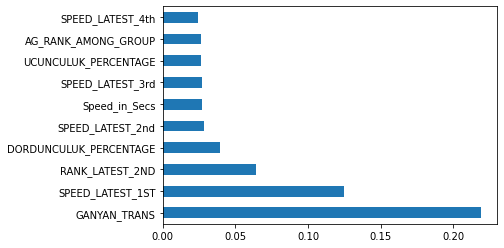

In [ ]:
feature_importance = pd.Series(cart.feature_importances_,
                          index=X_test.columns)
feature_importance.nlargest(10).plot(kind= "barh");

In [ ]:
a= pd.DataFrame(data= feature_importance.nlargest(10), columns= ["Importance"])
for feature_name in a.index[:10]:
    print("-"*28)
    print(feature_name + ":" )
    print("Feature Importance: {:.2%}".format(a.Importance[feature_name]))
    

----------------------------
GANYAN_TRANS:
Feature Importance: 21.92%
----------------------------
SPEED_LATEST_1ST:
Feature Importance: 12.45%
----------------------------
RANK_LATEST_2ND:
Feature Importance: 6.40%
----------------------------
DORDUNCULUK_PERCENTAGE:
Feature Importance: 3.93%
----------------------------
SPEED_LATEST_2nd:
Feature Importance: 2.83%
----------------------------
Speed_in_Secs:
Feature Importance: 2.72%
----------------------------
SPEED_LATEST_3rd:
Feature Importance: 2.69%
----------------------------
UCUNCULUK_PERCENTAGE:
Feature Importance: 2.67%
----------------------------
AG_RANK_AMONG_GROUP:
Feature Importance: 2.65%
----------------------------
SPEED_LATEST_4th:
Feature Importance: 2.41%


### CART - Model Tuning

In [ ]:
cart_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
cart_grid = {"max_depth": range(3,8),
            "min_samples_split" :list(range(40,80)),
            'criterion' : ("gini", "entropy") }

In [ ]:
cart = tree.DecisionTreeClassifier(class_weight = "balanced",)
cart_cv = GridSearchCV(cart, cart_grid, 
                       cv = 10, 
                       n_jobs = -1, 
                       verbose = 2)
cart_cv_model = cart_cv.fit(X_train, y_train)

Fitting 10 folds for each of 400 candidates, totalling 4000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done 718 tasks      | elapsed:   57.3s
[Parallel(n_jobs=-1)]: Done 1284 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 2014 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 2904 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 3943 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 4000 out of 4000 | elapsed:  7.5min finished


In [ ]:
print("En iyi parametreler: " + str(cart_cv_model.best_params_))

En iyi parametreler: {'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 42}


In [ ]:
cart = tree.DecisionTreeClassifier(criterion= "gini", 
                                   max_depth = 7, 
                                  
                                   min_samples_split = 42)
cart_tuned = cart.fit(X_train, y_train)

In [ ]:
y_pred = cart_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.8745954692556634

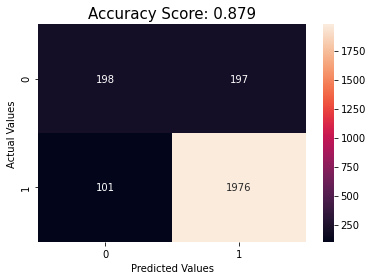

In [ ]:
from sklearn.metrics import confusion_matrix as cm
predictions = cart_tuned.predict(X_test)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(y_test, predictions)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(cart_tuned, 
                out_file="tree.png", 
                impurity=False, 
                filled=True)

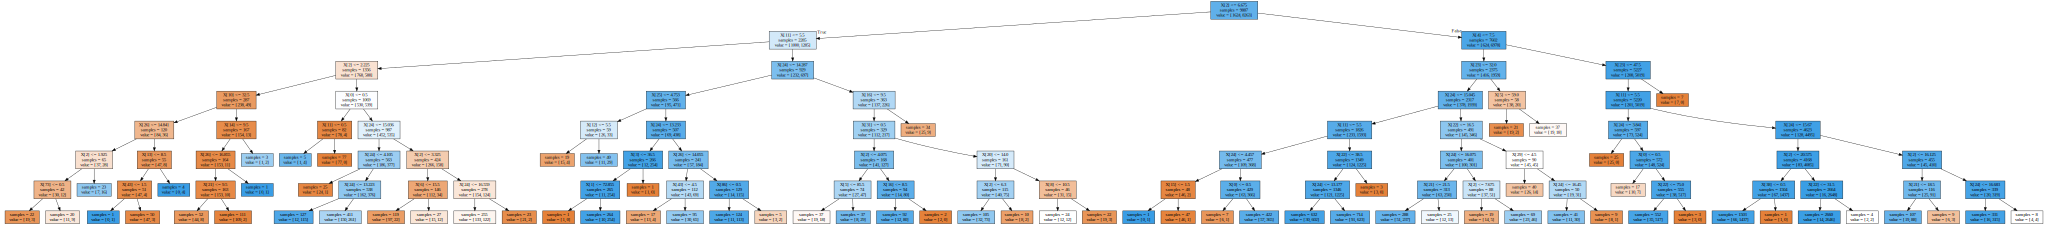

In [ ]:
import graphviz

with open("tree.png") as f: 
    dot_graph = f.read()
graphviz.Source(dot_graph)

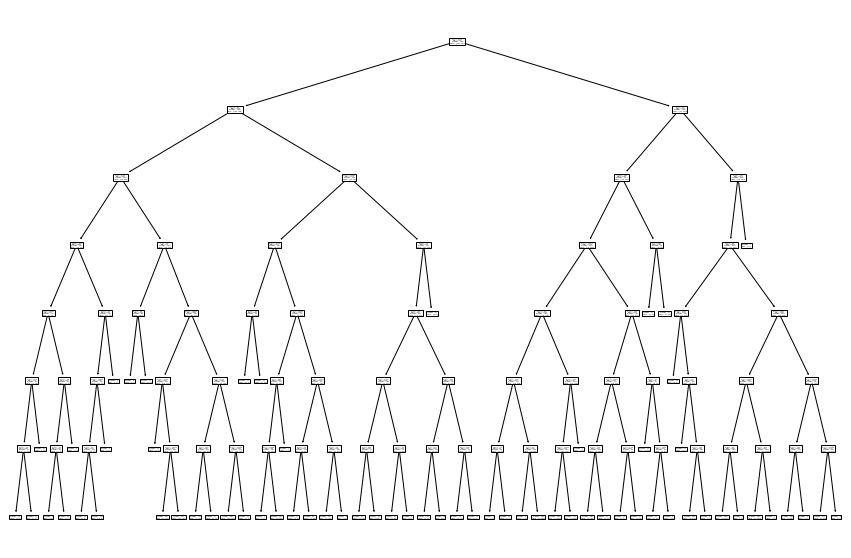

In [ ]:
plt.figure(figsize=(15,10))
tree.plot_tree(cart_tuned);

### Feature Importance

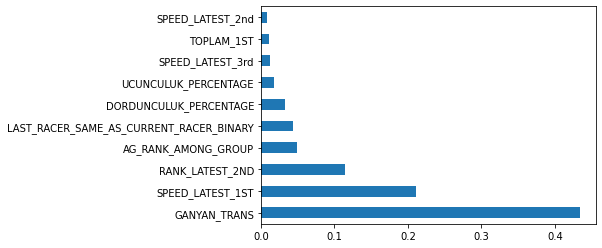

In [ ]:
# Feature Importance Before  Model Tuning
feature_importance = pd.Series(cart.feature_importances_,
                          index=X_test.columns)
feature_importance.nlargest(10).plot(kind= "barh");

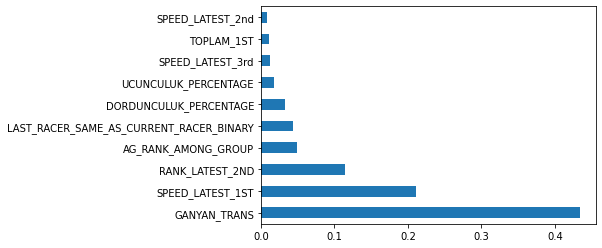

In [ ]:
## Feature Importance After Model Tuning
feature_importance = pd.Series(cart_tuned.feature_importances_,
                          index=X_test.columns)
feature_importance.nlargest(10).plot(kind= "barh");

In [ ]:
a= pd.DataFrame(data= feature_importance.nlargest(10), columns= ["Importance"])
for feature_name in a.index[:10]:
    print("-"*28)
    print(feature_name + ":" )
    print("Feature Importance: {:.2%}".format(a.Importance[feature_name]))   

----------------------------
GANYAN_TRANS:
Feature Importance: 43.40%
----------------------------
SPEED_LATEST_1ST:
Feature Importance: 21.06%
----------------------------
RANK_LATEST_2ND:
Feature Importance: 11.43%
----------------------------
AG_RANK_AMONG_GROUP:
Feature Importance: 4.91%
----------------------------
LAST_RACER_SAME_AS_CURRENT_RACER_BINARY:
Feature Importance: 4.35%
----------------------------
DORDUNCULUK_PERCENTAGE:
Feature Importance: 3.31%
----------------------------
UCUNCULUK_PERCENTAGE:
Feature Importance: 1.76%
----------------------------
SPEED_LATEST_3rd:
Feature Importance: 1.29%
----------------------------
TOPLAM_1ST:
Feature Importance: 1.03%
----------------------------
SPEED_LATEST_2nd:
Feature Importance: 0.81%


## BOOSTING MODELS

In [ ]:
pip install catboost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.multiclass import OneVsRestClassifier

### Gradient Boosting Model 

In [ ]:
GradientBoostingClassifier()

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
gbm_model = OneVsRestClassifier(GradientBoostingClassifier()).fit(X_train, y_train)

In [ ]:
y_pred = gbm_model.predict(X_test)
accurarcy_score_before = accuracy_score(y_test, y_pred)
accurarcy_score_before

0.8972491909385113

### Gradient Boosting Model Tuning

In [ ]:
gbm_params = {"learning_rate": [0.01, 0.3], 
              "n_estimators":[10,50,100],
              "max_depth": [3,5],
              "min_samples_split":[5,10]
             }

gbm = GradientBoostingClassifier()
gbm_cv = GridSearchCV(gbm,gbm_params,
                          cv=10,
                          n_jobs=-1,
                          verbose=2)

gbm_cv.fit(X_train, y_train)

In [ ]:
print("En iyi parametreler : " + str(gbm_cv.best_params_))

En iyi parametreler : {'learning_rate': 0.3, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 50}


In [ ]:
gbm = GradientBoostingClassifier(learning_rate=0.1,
                                n_estimators=500,
                                max_depth=10,
                                min_samples_split=10)

gbm_tuned = gbm.fit(X_train, y_train)

In [ ]:
?gbm_tuned

In [ ]:
y_pred = gbm_tuned.predict(X_test)
accurarcy_score_after = accuracy_score(y_test, y_pred)
accurarcy_score_after

0.904126213592233

In [ ]:
def accurarcy_score_check(accscorebefore, accscoreafter):
    print("Before Tuning score : ", accscorebefore )
    print("After Tuning score :", accscoreafter)
    
    if(accscoreafter > accscorebefore):
        print("İyileşme oldu : ", accscoreafter-accscorebefore)

In [ ]:
accurarcy_score_check(accurarcy_score_before, accurarcy_score_after)

Before Tuning score :  0.8972491909385113
After Tuning score : 0.9085760517799353
İyileşme oldu :  0.01132686084142398


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        in_5       0.80      0.57      0.67       395
       out_5       0.92      0.97      0.95      2077

    accuracy                           0.91      2472
   macro avg       0.86      0.77      0.81      2472
weighted avg       0.90      0.91      0.90      2472



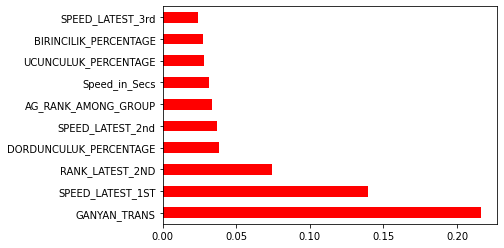

In [ ]:
feature_importance = pd.Series(gbm_tuned.feature_importances_,
                          index=X_test.columns)
feature_importance.nlargest(10).plot(kind= "barh", color = "red");

In [ ]:
a= pd.DataFrame(data= feature_importance.nlargest(10), columns= ["Importance"])
for feature_name in a.index[:10]:
    print("-"*28)
    print(feature_name + ":" )
    print("Feature Importance: {:.2%}".format(a.Importance[feature_name]))   

----------------------------
GANYAN_TRANS:
Feature Importance: 21.66%
----------------------------
SPEED_LATEST_1ST:
Feature Importance: 13.94%
----------------------------
RANK_LATEST_2ND:
Feature Importance: 7.46%
----------------------------
DORDUNCULUK_PERCENTAGE:
Feature Importance: 3.85%
----------------------------
SPEED_LATEST_2nd:
Feature Importance: 3.73%
----------------------------
AG_RANK_AMONG_GROUP:
Feature Importance: 3.34%
----------------------------
Speed_in_Secs:
Feature Importance: 3.17%
----------------------------
UCUNCULUK_PERCENTAGE:
Feature Importance: 2.81%
----------------------------
BIRINCILIK_PERCENTAGE:
Feature Importance: 2.78%
----------------------------
SPEED_LATEST_3rd:
Feature Importance: 2.39%


### Light GBM Model

In [ ]:
pip install lightgbm==3.0.0


     |████████████████████████████████| 1.0 MB 221 kB/s eta 0:00:01
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 2.2.3
    Uninstalling lightgbm-2.2.3:
      Successfully uninstalled lightgbm-2.2.3
Note: you may need to restart the kernel to use updated packages.


In [ ]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

y_pred = lgbm_model.predict(X_test)

accurarcy_score_before = accuracy_score(y_test, y_pred)
accurarcy_score_before

0.9025080906148867

In [ ]:
lgbm_B = accurarcy_score_before
lgbm_model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

### Light GBM Model Tuning

In [ ]:
lgbm_params = {"learning_rate": [0.1, 0.3, 0.5], 
              "n_estimators":[50,100,200],
              "subsamples" : [0.6,1.0],
              "max_depth": [3,4,6],
              "min_child_samples":[5,10,20]
             }

lgbm = LGBMClassifier()

In [ ]:
lgbm_cv = GridSearchCV(lgbm,lgbm_params,
                          cv=10,
                          n_jobs=-1,
                          verbose=2)

lgbm_cv.fit(X_train, y_train)

In [ ]:
lgbm_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_samples': 5,
 'n_estimators': 200,
 'subsamples': 0.6}

In [ ]:
print("En iyi parametreler : " + str(lgbm_cv.best_params_))

En iyi parametreler : {'learning_rate': 0.1, 'max_depth': 6, 'min_child_samples': 5, 'n_estimators': 200, 'subsamples': 0.6}


In [ ]:
lgbm = LGBMClassifier(learning_rate=0.1,
                    subsamples = 0.6,
                    n_estimators=200,
                    max_depth=6,
                    min_child_samples=5)

In [ ]:
lgbm_tuned = lgbm.fit(X_train, y_train)

In [ ]:
y_pred = lgbm_tuned.predict(X_test)
accurarcy_score_after = accuracy_score(y_test, y_pred)
accurarcy_score_after

0.8353559870550162

In [ ]:
accurarcy_score_check(accurarcy_score_before, accurarcy_score_after)

Before Tuning score :  0.9025080906148867
After Tuning score : 0.9049352750809061
İyileşme oldu :  0.0024271844660194164


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        in_5       0.78      0.57      0.66       395
       out_5       0.92      0.97      0.94      2077

    accuracy                           0.90      2472
   macro avg       0.85      0.77      0.80      2472
weighted avg       0.90      0.90      0.90      2472



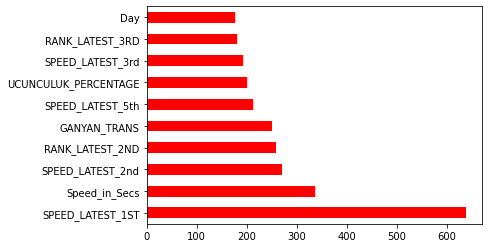

In [ ]:
feature_importance = pd.Series(lgbm_tuned.feature_importances_,
                          index=X_test.columns)
feature_importance.nlargest(10).plot(kind= "barh", color = "red");

In [ ]:
a= pd.DataFrame(data= feature_importance.nlargest(10), columns= ["Importance"])
for feature_name in a.index[:10]:
    print("-"*28)
    print(feature_name + ":" )
    print("Feature Importance: {:.1%}".format(a.Importance[feature_name]/1000)) 

----------------------------
SPEED_LATEST_1ST:
Feature Importance: 63.7%
----------------------------
Speed_in_Secs:
Feature Importance: 33.7%
----------------------------
SPEED_LATEST_2nd:
Feature Importance: 27.0%
----------------------------
RANK_LATEST_2ND:
Feature Importance: 25.8%
----------------------------
GANYAN_TRANS:
Feature Importance: 25.1%
----------------------------
SPEED_LATEST_5th:
Feature Importance: 21.3%
----------------------------
UCUNCULUK_PERCENTAGE:
Feature Importance: 20.0%
----------------------------
SPEED_LATEST_3rd:
Feature Importance: 19.2%
----------------------------
RANK_LATEST_3RD:
Feature Importance: 18.0%
----------------------------
Day:
Feature Importance: 17.7%


### Cat Boosting Model 

In [ ]:
cat_model = OneVsRestClassifier(CatBoostClassifier()).fit(X_train, y_train)

Learning rate set to 0.027405
0:	learn: 0.6684967	total: 9.84ms	remaining: 9.83s
1:	learn: 0.6432581	total: 18.8ms	remaining: 9.36s
2:	learn: 0.6202244	total: 27.7ms	remaining: 9.19s
3:	learn: 0.6001600	total: 37ms	remaining: 9.2s
4:	learn: 0.5828483	total: 45.5ms	remaining: 9.06s
5:	learn: 0.5638642	total: 54.4ms	remaining: 9.01s
6:	learn: 0.5491263	total: 63.3ms	remaining: 8.97s
7:	learn: 0.5332733	total: 72.3ms	remaining: 8.97s
8:	learn: 0.5175095	total: 81.2ms	remaining: 8.94s
9:	learn: 0.5046647	total: 90ms	remaining: 8.9s
10:	learn: 0.4926170	total: 99ms	remaining: 8.9s
11:	learn: 0.4813853	total: 108ms	remaining: 8.89s
12:	learn: 0.4694224	total: 117ms	remaining: 8.89s
13:	learn: 0.4572244	total: 126ms	remaining: 8.88s
14:	learn: 0.4473151	total: 135ms	remaining: 8.86s
15:	learn: 0.4404588	total: 144ms	remaining: 8.85s
16:	learn: 0.4331326	total: 153ms	remaining: 8.83s
17:	learn: 0.4257028	total: 162ms	remaining: 8.83s
18:	learn: 0.4180523	total: 171ms	remaining: 8.85s
19:	learn

In [ ]:
y_pred = cat_model.predict(X_test)
accurarcy_score_before = accuracy_score(y_test, y_pred)
accurarcy_score_before

0.9081715210355987

### Cat Boosting Model Tuning

In [ ]:
catb_params = {"iterations": [200,500], 
              "learning_rate":[0.01, 0.05, 0.1],
              "depth" : [3,57]
             }

catb = CatBoostClassifier()
catb_cv_model = GridSearchCV(catb,catb_params,
                          cv=5,
                          n_jobs=-1,
                          verbose=2)

catb_cv_model.fit(X_train, y_train)

In [ ]:
print("En iyi parametreler : " + str(catb_cv_model.best_params_))

En iyi parametreler : {'depth': 3, 'iterations': 500, 'learning_rate': 0.1}


In [ ]:
catb = CatBoostClassifier(learning_rate=0.1,
                    iterations=750,
                    depth=3)

In [ ]:
catb_tuned = catb.fit(X_train, y_train)

0:	learn: 0.6097857	total: 5.26ms	remaining: 3.94s
1:	learn: 0.5456892	total: 10.5ms	remaining: 3.94s
2:	learn: 0.4983699	total: 15.5ms	remaining: 3.86s
3:	learn: 0.4647195	total: 20.2ms	remaining: 3.77s
4:	learn: 0.4402514	total: 25.3ms	remaining: 3.77s
5:	learn: 0.4160644	total: 30.7ms	remaining: 3.8s
6:	learn: 0.4004442	total: 35.5ms	remaining: 3.77s
7:	learn: 0.3841115	total: 40.6ms	remaining: 3.77s
8:	learn: 0.3722064	total: 45.6ms	remaining: 3.76s
9:	learn: 0.3630007	total: 50.9ms	remaining: 3.76s
10:	learn: 0.3526088	total: 55.6ms	remaining: 3.73s
11:	learn: 0.3476407	total: 60.9ms	remaining: 3.74s
12:	learn: 0.3406391	total: 66ms	remaining: 3.74s
13:	learn: 0.3365494	total: 70.9ms	remaining: 3.73s
14:	learn: 0.3321591	total: 76.2ms	remaining: 3.73s
15:	learn: 0.3255363	total: 81.2ms	remaining: 3.72s
16:	learn: 0.3208709	total: 86.6ms	remaining: 3.73s
17:	learn: 0.3173517	total: 93.3ms	remaining: 3.79s
18:	learn: 0.3151943	total: 101ms	remaining: 3.87s
19:	learn: 0.3130671	total

In [ ]:
y_pred = catb_tuned.predict(X_test)
accurarcy_score_after = accuracy_score(y_test, y_pred)
accurarcy_score_after

0.906957928802589

In [ ]:
accurarcy_score_check(accurarcy_score_before, accurarcy_score_after)

Before Tuning score :  0.9081715210355987
After Tuning score : 0.9081715210355987


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        in_5       0.80      0.57      0.67       395
       out_5       0.92      0.97      0.95      2077

    accuracy                           0.91      2472
   macro avg       0.86      0.77      0.81      2472
weighted avg       0.90      0.91      0.90      2472



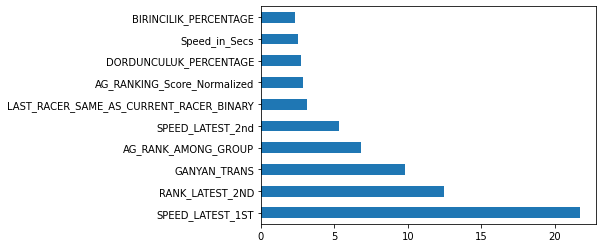

In [ ]:
feature_importance = pd.Series(catb_tuned.feature_importances_,
                          index=X_test.columns)
feature_importance.nlargest(10).plot(kind= "barh");

In [ ]:
a= pd.DataFrame(data= feature_importance.nlargest(10), columns= ["Importance"])
for feature_name in a.index[:10]:
    print("-"*28)
    print(feature_name + ":" )
    print("Feature Importance: {:.2%}".format(a.Importance[feature_name]/100))

----------------------------
SPEED_LATEST_1ST:
Feature Importance: 21.69%
----------------------------
RANK_LATEST_2ND:
Feature Importance: 12.42%
----------------------------
GANYAN_TRANS:
Feature Importance: 9.80%
----------------------------
AG_RANK_AMONG_GROUP:
Feature Importance: 6.77%
----------------------------
SPEED_LATEST_2nd:
Feature Importance: 5.34%
----------------------------
LAST_RACER_SAME_AS_CURRENT_RACER_BINARY:
Feature Importance: 3.11%
----------------------------
AG_RANKING_Score_Normalized:
Feature Importance: 2.84%
----------------------------
DORDUNCULUK_PERCENTAGE:
Feature Importance: 2.72%
----------------------------
Speed_in_Secs:
Feature Importance: 2.50%
----------------------------
BIRINCILIK_PERCENTAGE:
Feature Importance: 2.29%


## NEURAL NETWORK MODEL

In [ ]:
from sklearn.preprocessing import scale  

In [ ]:

X_train = scale(X_train) 
X_test = scale(X_test) 

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlpc = MLPClassifier().fit(X_train, y_train)

In [ ]:
y_pred = mlpc.predict(X_test)
accuracy_score(y_test, y_pred)

0.8491100323624595

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        in_5       0.53      0.54      0.53       395
       out_5       0.91      0.91      0.91      2077

    accuracy                           0.85      2472
   macro avg       0.72      0.72      0.72      2472
weighted avg       0.85      0.85      0.85      2472



###  Neural Network- Model Tuning

In [ ]:
mlpc

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
mlp_param = {"alpha": [0.1,0.01,0.02,0.3,0.4,0.5],
             "activation": ["relu","logistic"],
            "hidden_layer_sizes":[(5,5), (6,6), (7,7), (8,8)]}

In [ ]:
mlp_cv_model = GridSearchCV(mlp_model,
                            mlp_param, 
                            cv=10, n_jobs=-1, 
                            verbose=2)
mlp_cv_model.fit(X_train, y_train)

In [ ]:
mlp_cv_model.best_params_

In [ ]:
mlp_tuned = MLPClassifier(activation='relu', alpha=0.5, hidden_layer_sizes=(5,5))

In [ ]:
mlp_tuned.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.5, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 5), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
y_pred = mlp_tuned.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        in_5       0.65      0.47      0.54       395
       out_5       0.90      0.95      0.93      2077

    accuracy                           0.87      2472
   macro avg       0.78      0.71      0.74      2472
weighted avg       0.86      0.87      0.87      2472



## RANDOM FOREST MODEL

In [ ]:
data= pd.read_csv("Horse_Racing_Project_son1.csv",index_col="ID")
df = data.copy()
df.head()

df['ılk_3'] = df['ılk_3'].astype(str)
df['ılk_5'] = df['ılk_5'].astype(str)
df['Winner'] = df['Winner'].astype(str)
df['RANK'] = df['RANK'].astype(str)

Hafta_Gunu = []

for i in df["day_of_week"]:
    
    # m= i.weekday()
    
    if i>=0 and i<5:
        Hafta_Gunu.append("Hafta İçi")
    else:
        Hafta_Gunu.append("Hafta Sonu") 

Hafta_Gunu[0:5]  


df.insert(2, "Hafta_Gunu",Hafta_Gunu, True)

data = df.copy()

In [ ]:
rf5_model = RandomForestClassifier(random_state=42)
rf5_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
dummy_variable =pd.get_dummies(df[['city','Hafta_Gunu', 'kosu_zamanı', "at_ana", "at_baba", "Mevsim", "at_soyu"]])

In [ ]:
y = data["ılk_5"]
X_ = data.drop(["RANK",'city','Hafta_Gunu', 'kosu_zamanı', "at_ana", "at_baba", "Mevsim", "Winner", "ılk_3", "ılk_5", "at_soyu"],axis=1).astype('float64')
X = pd.concat((X_,dummy_variable),axis=1)


X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.20,
                                                    random_state=42)
print("X_train shape",X_train.shape)
print("X_test shape",X_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

X_train shape (9887, 90)
X_test shape (2472, 90)
y_train shape (9887,)
y_test shape (2472,)


In [ ]:
rf5_model = RandomForestClassifier(random_state=42)
rf5_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
y_pred = rf5_model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.8830906148867314

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        in_5       0.71      0.45      0.55       395
       out_5       0.90      0.97      0.93      2077

    accuracy                           0.88      2472
   macro avg       0.81      0.71      0.74      2472
weighted avg       0.87      0.88      0.87      2472



###Random Forest Model Tuning

In [ ]:
params = {      "max_depth" : [3,5,6,7],
                "max_features": [5,8,10],
                "min_samples_split" : [2,5,10],
                "n_estimators": [300,500,1000]
         }

In [ ]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           params, 
                           cv = 5, 
                           n_jobs = -1, 
                           verbose = 2) 

In [ ]:
rf_cv_model.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 18.1min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 30.9min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
print("En iyi parametreler: " + str(rf_cv_model.best_params_))

En iyi parametreler: {'max_depth': 7, 'max_features': 10, 'min_samples_split': 10, 'n_estimators': 1000}


In [ ]:
rf_tuned = RandomForestClassifier(max_depth = 7,
                                  max_features =10, 
                                  min_samples_split =10,
                                  n_estimators = 500,
                                  random_state=42,class_weight ="balanced")
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=7, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.8102750809061489

# ***COMPARISON OF MODELS***

In [ ]:
modeller = [
    mlp_tuned,
    cart_tuned,
    rf_tuned,
    gbm_tuned,
    catb_tuned,
    lgbm_tuned,]

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)     
    dogruluk = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(isimler + ":" )
    print("Accuracy: {:.4%}".format(dogruluk))

----------------------------
MLPClassifier:
Accuracy: 87.4595%
----------------------------
DecisionTreeClassifier:
Accuracy: 87.4595%
----------------------------
RandomForestClassifier:
Accuracy: 81.0275%
----------------------------
GradientBoostingClassifier:
Accuracy: 90.4126%
----------------------------
CatBoostClassifier:
Accuracy: 90.6958%
----------------------------
LGBMClassifier:
Accuracy: 83.5356%


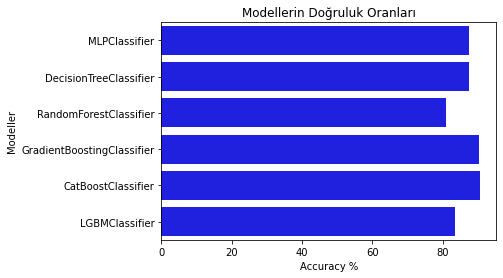

In [ ]:
sonuc = []

sonuclar = pd.DataFrame(columns= ["Modeller","Accuracy"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)    
    sonuc = pd.DataFrame([[isimler, dogruluk*100]], columns= ["Modeller","Accuracy"])
    sonuclar = sonuclar.append(sonuc)
    
    
sns.barplot(x= 'Accuracy', y = 'Modeller', data=sonuclar, color="b")
plt.xlabel('Accuracy %')
plt.title('Modellerin Doğruluk Oranları');